C:\Users\thivi\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


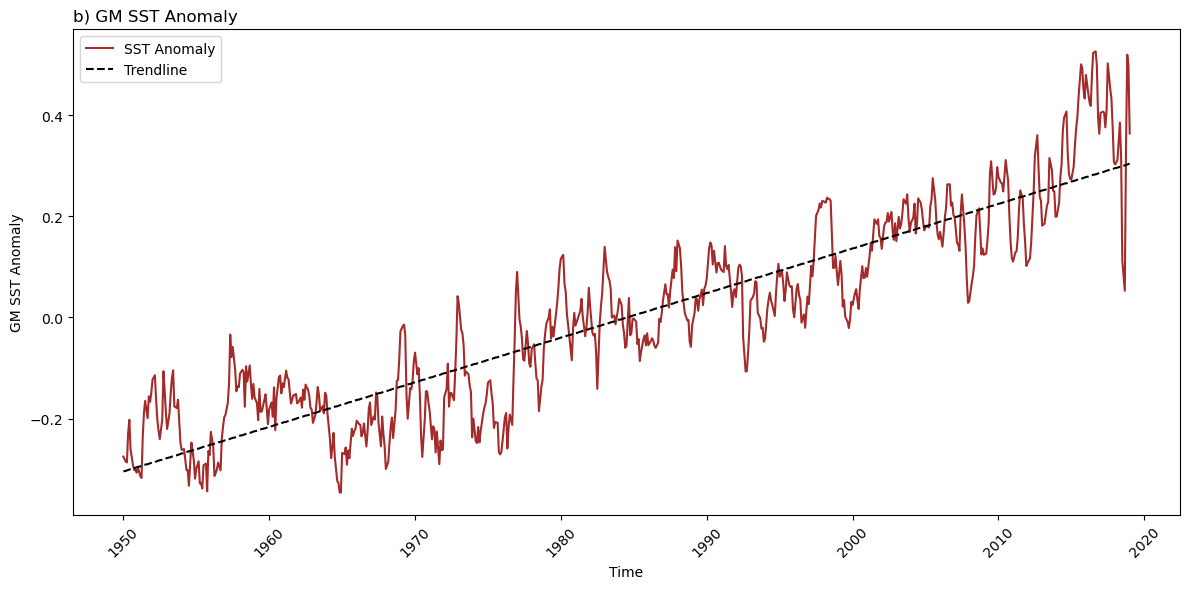

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import xarray as xr
import netCDF4 as nc
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import matplotlib.ticker as mticker

fn1 = './global.nc'
ds = xr.open_dataset(fn1)
ds = ds.sel(time=slice('1950-01-01', '2019-01-01'))
sst = ds.sst

clm = sst.groupby('time.month').mean('time');
an_ds = sst.groupby('time.month') - clm;
an_ds = an_ds.mean(('lat','lon')); 

# Calculate the IQR (Interquartile Range)
Q1 = an_ds.quantile(0.25)
Q3 = an_ds.quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for non-outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the annual_mean data to remove outliers
an_ds = an_ds.where((an_ds >= lower_bound) & (an_ds <= upper_bound), drop=True)

# Create a DataFrame with 'an_ds' and 'year-month' columns
df = pd.DataFrame({'an_ds': an_ds.values}, index=an_ds.time.values)

# Reset the index to get 'year-month' as a separate column
df.reset_index(inplace=True)
df.rename(columns={'index': 'year-month'}, inplace=True)

#print(df)

# Plotting the time series
plt.figure(figsize=(12, 6))
plt.plot(df['year-month'], df['an_ds'], linestyle='-', color='brown', label='SST Anomaly')
plt.xlabel('Time')
plt.ylabel('GM SST Anomaly')
#plt.title('Time Series of Global anomaly')

# Adding a trendline
x = np.arange(len(df))
z = np.polyfit(x, df['an_ds'], 1)
p = np.poly1d(z)
plt.plot(df['year-month'], p(x), '--',color='black', label='Trendline')

plt.xticks(rotation=45)  # Rotate x-axis labels for readability
#plt.grid(True)

# Add a legend
plt.legend()

plt.title('b) GM SST Anomaly',loc= 'left')


plt.tight_layout()
plt.show()